In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn.datasets import make_moons
x,y=make_moons(n_samples=1000,  noise=0.2)


In [20]:
dataset=pd.DataFrame(x, columns=['a','b'])
dataset['target']=y
dataset.head()

a         b  target
0  0.835405 -0.796698       1
1 -0.076114  0.418186       1
2  0.009857 -0.106724       1
3  1.381492  0.231730       0
4  0.571606 -0.615696       1

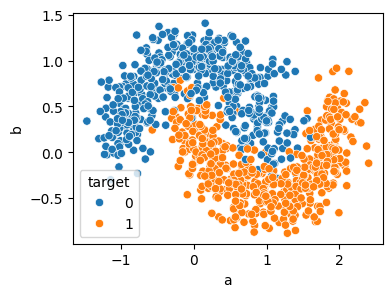

In [21]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='a',y='b', data=dataset, hue='target')
plt.show()

In [23]:
x=dataset.drop(columns='target', axis=1)
y=dataset['target']

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

## ab hm ek ek model pr train kryn gy alag alag or dekhy gy accuracy and then hm max-voting
## k zrye teeno models ko akatha kr k predict kryn gy

In [ ]:
# SVM    DT       NAIVE BAISE

In [30]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train, y_train)
svm.score(x_train, y_train)*100,  svm.score(x_test, y_test)*100

(96.5, 96.5)

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt.score(x_train, y_train)*100,  dt.score(x_test, y_test)*100

(100.0, 95.0)

In [34]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_train, y_train)*100,  gnb.score(x_test, y_test)*100

(86.5, 88.0)

# now we will use voting classifier and check score

In [57]:
from sklearn.ensemble import VotingClassifier
w=[4,10,7]
models=[('sv',SVC()),('dtree',DecisionTreeClassifier()),('g_nb',GaussianNB())]
vc=VotingClassifier(estimators=models, weights=w)
vc.fit(x_train, y_train)


VotingClassifier(estimators=[('sv', SVC()), ('dtree', DecisionTreeClassifier()),
                             ('g_nb', GaussianNB())],
                 weights=[4, 10, 7])

In [58]:
vc.score(x_train,y_train)*100, vc.score(x_test, y_test)*100

(97.25, 95.5)

#  we can also check kesy is n majority of predictions ki vase pr kaam kia

In [59]:
d={"svm":svm.predict(x_test), "dt":dt.predict(x_test), "gnb":gnb.predict(x_test), "max_voting":vc.predict(x_test)}
prd=pd.DataFrame(d)
prd

svm  dt  gnb  max_voting
0      0   0    0           0
1      0   0    0           0
2      0   0    0           0
3      1   1    1           1
4      0   0    0           0
..   ...  ..  ...         ...
195    1   1    1           1
196    1   1    1           1
197    1   1    1           1
198    1   1    0           1
199    1   1    0           1

[200 rows x 4 columns]